In [1]:
import tensorflow as tf
import os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import roc_curve, auc

In [2]:
def abrirData(diretorio):
    arq_dados = os.listdir(diretorio)
    ndc = len(arq_dados)
    dados = np.empty([ndc,21,21])

    for i in range(ndc):
        dados[i,:,:,]  = cv2.imread(diretorio + arq_dados[i],0) 
    return dados

test_com = abrirData('./test/com/')
test_sem = abrirData('./test/sem/')
train_com = abrirData('./train/com/')
train_sem = abrirData('./train/sem/')
    
print('dados com: ',test_com.shape)

dados com:  (5188, 21, 21)


In [3]:
train_set = np.concatenate([train_com, train_sem],axis=0)
train_label = np.zeros((len(train_set),2))
train_label[:train_com.shape[0],0] = 1
train_label[train_com.shape[0]+1:,1] = 1

ind = np.random.randint(0, high=len(train_set), size=len(train_set), dtype=int)

train_set = train_set[ind,:,:]
train_label = train_label[ind,:]

test_set = np.concatenate([test_com, test_sem],axis=0)
test_label = np.zeros((len(test_set),2))
test_label[:test_com.shape[0],0] = 1
test_label[test_com.shape[0]+1:,1] = 1

ind = np.random.randint(0, high=len(test_set), size=len(test_set), dtype=int)

test_set = test_set[ind,:,:]
test_label = test_label[ind]

print('Train set: ',train_set.shape, train_label.shape)
print('Test set: ',test_set.shape, test_label.shape)


Train set:  (24272, 21, 21) (24272, 2)
Test set:  (10376, 21, 21) (10376, 2)


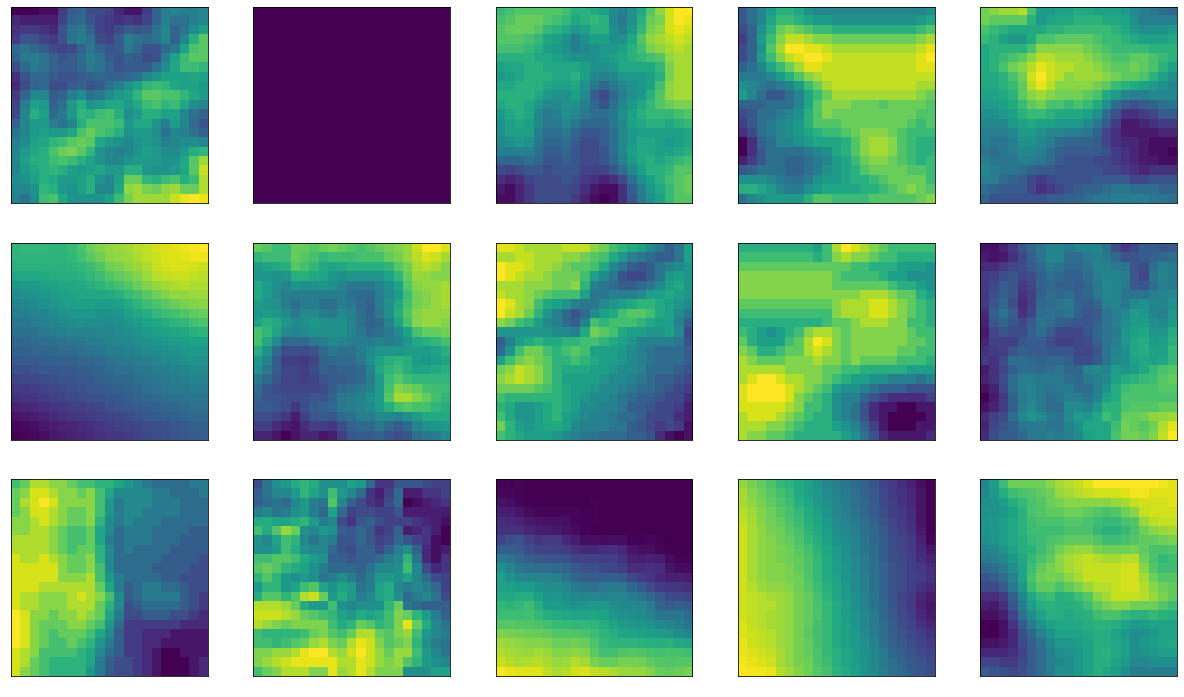

In [5]:
classe = ('sem','com')

plt.figure(figsize=(21,21))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i,:,:])
    plt.xlabel(classe[int(train_label[i,0])], color ='white' )
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(21, 21,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 19, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 64)                0

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_set, train_label, epochs=5, 
                    validation_data=(test_set, test_label))

Epoch 1/5
759/759 [==============================] - 12s 13ms/step - loss: 0.7195 - accuracy: 0.5317 - val_loss: 0.7111 - val_accuracy: 0.5341
Epoch 2/5
759/759 [==============================] - 10s 14ms/step - loss: 0.6701 - accuracy: 0.5382 - val_loss: 0.6757 - val_accuracy: 0.5147
Epoch 3/5
759/759 [==============================] - 10s 13ms/step - loss: 0.6710 - accuracy: 0.5384 - val_loss: 0.7090 - val_accuracy: 0.5328
Epoch 4/5
759/759 [==============================] - 10s 13ms/step - loss: 0.6887 - accuracy: 0.5361 - val_loss: 0.6851 - val_accuracy: 0.5334
Epoch 5/5
759/759 [==============================] - 10s 13ms/step - loss: 0.6717 - accuracy: 0.5406 - val_loss: 0.6764 - val_accuracy: 0.5372


325/325 - 1s - loss: 0.6764 - accuracy: 0.5372 - 1s/epoch - 4ms/step
(20752,)


ValueError: Found input variables with inconsistent numbers of samples: [10376, 20752]

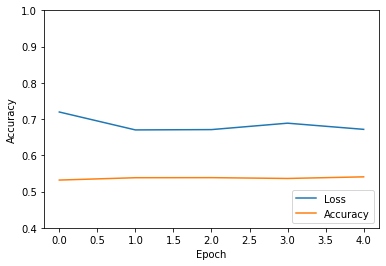

In [8]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set,  test_label, verbose=2)

y_pred = model.predict(test_set).ravel()
print(y_pred.shape)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(test_label[:,0], y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [11]:
print('Acc: ',test_acc)
print('Loss: ',test_loss)

Acc:  0.5101460814476013
Loss:  0.6655783653259277
